In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r'D:\0_Respaldo\0_Proyectos_2024\ML proyects\House price predictions\House_P_P\data\Housing (1).csv')

In [4]:
df = data.copy()

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
df.isnull().count()

price               545
area                545
bedrooms            545
bathrooms           545
stories             545
mainroad            545
guestroom           545
basement            545
hotwaterheating     545
airconditioning     545
parking             545
prefarea            545
furnishingstatus    545
dtype: int64

In [8]:
df.drop_duplicates()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


## Transformaciones

### mainroad

In [9]:
df['mainroad'].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [10]:
mainroad_map = {'no':0,'yes':1}
df['mainroad'] = df['mainroad'].replace(mainroad_map).infer_objects()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_2836\3952728788.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['mainroad'] = df['mainroad'].replace(mainroad_map).infer_objects()


In [11]:
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,no,yes,no,no,2,yes,semi-furnished


### guestroom

In [12]:
df['guestroom'].value_counts()

guestroom
no     448
yes     97
Name: count, dtype: int64

In [13]:
map = {'no':0,'yes':1}
df['guestroom'] = df['guestroom'].replace(map).infer_objects()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_2836\3138877352.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['guestroom'] = df['guestroom'].replace(map).infer_objects()


In [14]:
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,0,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,0,yes,no,no,2,yes,semi-furnished


### 	basement

In [15]:
df['basement'].value_counts()

basement
no     354
yes    191
Name: count, dtype: int64

In [16]:
map = {'no':0,'yes':1}
df['basement'] = df['basement'].replace(map).infer_objects()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_2836\1861210902.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['basement'] = df['basement'].replace(map).infer_objects()


In [17]:
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,0,0,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,0,1,no,no,2,yes,semi-furnished


### hotwaterheating

In [18]:
df['hotwaterheating'].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

In [19]:
map = {'no':0,'yes':1}
df['hotwaterheating'] = df['hotwaterheating'].replace(map).infer_objects()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_2836\1608882157.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hotwaterheating'] = df['hotwaterheating'].replace(map).infer_objects()


In [20]:
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,0,0,0,yes,3,no,furnished
2,12250000,9960,3,2,2,1,0,1,0,no,2,yes,semi-furnished


### airconditioning

In [21]:
df['airconditioning'].value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

In [22]:
map = {'no':0,'yes':1}
df['airconditioning'] = df['airconditioning'].replace(map).infer_objects()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_2836\1574243484.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['airconditioning'] = df['airconditioning'].replace(map).infer_objects()


In [23]:
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,yes,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,no,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,yes,semi-furnished


### prefarea

In [24]:
df['prefarea'].value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

In [25]:
map = {'no':0,'yes':1}
df['prefarea'] = df['prefarea'].replace(map).infer_objects()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_2836\182239663.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['prefarea'] = df['prefarea'].replace(map).infer_objects()


In [26]:
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished


### furnishingstatus

In [27]:
df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [28]:
map = {'unfurnished':0,'semi-furnished':1, 'furnished': 2}
df['furnishingstatus'] = df['furnishingstatus'].replace(map).infer_objects()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_2836\254152114.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['furnishingstatus'] = df['furnishingstatus'].replace(map).infer_objects()


In [29]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


## Outlayers y  Correlaciones

### Outlayers

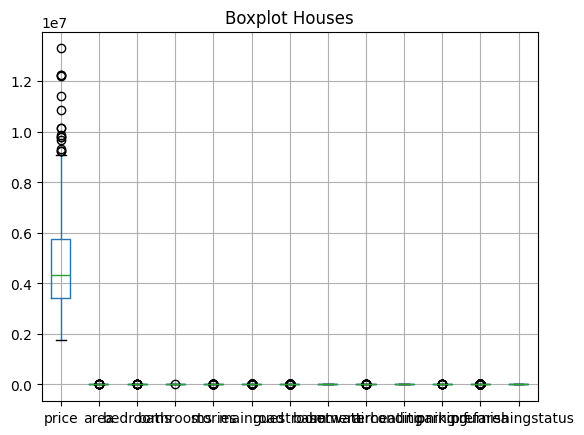

In [30]:
df.boxplot()
plt.title('Boxplot Houses')
plt.show()

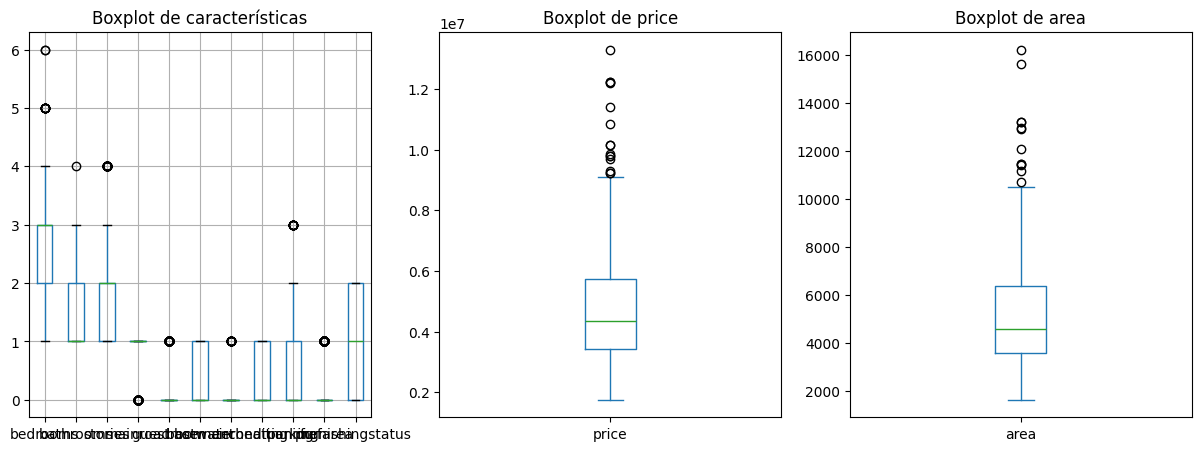

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

df_base = df.drop(['price','area'], axis=1)

# Subplot 1: Todas las columnas excepto 'price'
df_base.boxplot(ax=axes[0])
axes[0].set_title('Boxplot de características')

# Subplot 2: Solo la columna 'price'
df['price'].plot(kind='box', ax=axes[1])
axes[1].set_title('Boxplot de price')

# Subplot 3: Solo la columna 'area'
df['area'].plot(kind='box', ax=axes[2])
axes[2].set_title('Boxplot de area')

# Ajustar el diseño y mostrar los subplots
#plt.tight_layout()
plt.show()

Utilizare el metodo logaritmico para aplanar los valores outlayers.

In [32]:
import numpy as np

In [33]:
price_log = np.log(df['price'])
area_log = np.log(df['area'])

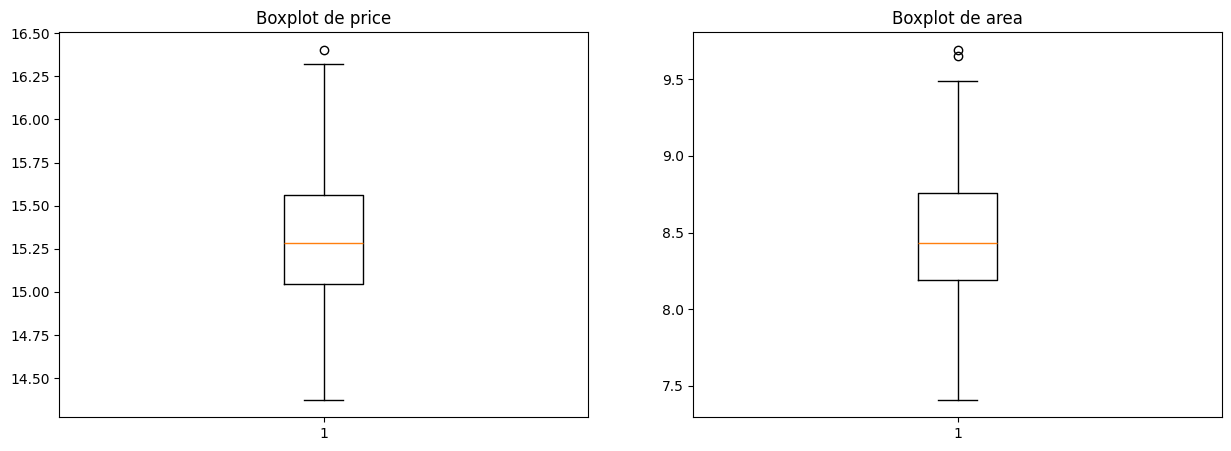

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot de 'price_log'
axes[0].boxplot(price_log)
axes[0].set_title('Boxplot de price')

# Boxplot de 'area_log'
axes[1].boxplot(area_log)
axes[1].set_title('Boxplot de area')

# Mostrar los subplots
plt.show()

In [35]:
# Elimino la columna price del dataframe df para concatenar el nuevo valor logaritmico.
del df['price']
del df['area']

In [36]:
df2 = pd.concat([df,area_log,price_log], axis=1)

In [37]:
df2.head(3)

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area,price
0,4,2,3,1,0,0,0,1,2,1,2,8.911934,16.403275
1,4,4,4,1,0,0,0,1,3,0,2,9.100526,16.321036
2,3,2,2,1,0,1,0,0,2,1,1,9.206332,16.321036


### Correlacion

In [38]:
p_corr = df2.corr()

In [39]:
#Target price

corTarget = abs(p_corr['price'])
#relevant efatures = corTarget[corTarget > 0.1]
                

In [40]:
corTarget

bedrooms            0.369986
bathrooms           0.485715
stories             0.415281
mainroad            0.330041
guestroom           0.277047
basement            0.218401
hotwaterheating     0.088968
airconditioning     0.455159
parking             0.371638
prefarea            0.340557
furnishingstatus    0.338646
area                0.580085
price               1.000000
Name: price, dtype: float64

<Figure size 800x600 with 0 Axes>

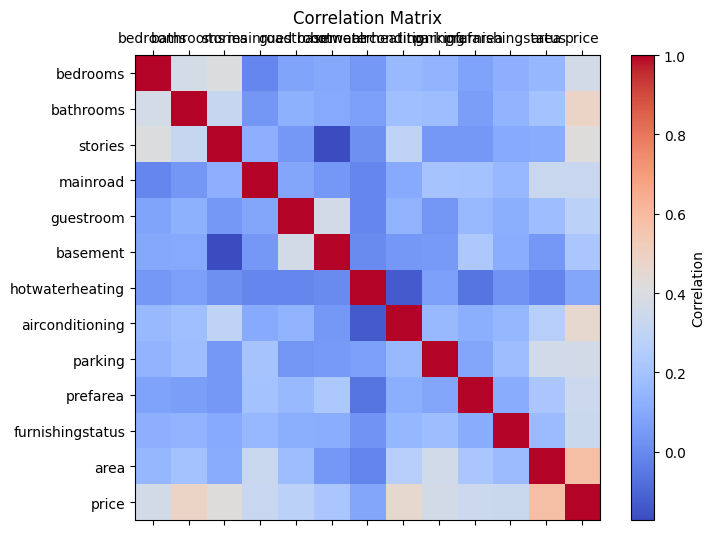

In [42]:
plt.figure(figsize=(8, 6))
plt.matshow(p_corr, cmap='coolwarm', fignum=1)
plt.colorbar(label='Correlation')
plt.xticks(range(len(p_corr.columns)), p_corr.columns)
plt.yticks(range(len(p_corr.columns)), p_corr.columns)
plt.title('Correlation Matrix')
plt.show()

### Export dataframe

In [156]:
df2.to_csv(r'data\Housing_clean.csv', index=False)

In [140]:
df3 = df2.mean()

In [141]:
df3

bedrooms             2.965138
bathrooms            1.286239
stories              1.805505
mainroad             0.858716
guestroom            0.177982
basement             0.350459
hotwaterheating      0.045872
airconditioning      0.315596
parking              0.693578
prefarea             0.234862
furnishingstatus     0.930275
area                 8.466537
price               15.306987
dtype: float64

In [142]:
df3.info()

<class 'pandas.core.series.Series'>
Index: 13 entries, bedrooms to price
Series name: None
Non-Null Count  Dtype  
--------------  -----  
13 non-null     float64
dtypes: float64(1)
memory usage: 764.0+ bytes


In [143]:
df_area = df3.pop('area')
df_area

8.466537459045602

In [144]:
df_price = df3.pop('price')
df_price

15.306986880099473

In [145]:
df_price = np.exp(df_price)
df_area = np.exp(df_area)

In [147]:
df3 = df3.to_list()

In [148]:
df3

[2.9651376146788992,
 1.2862385321100918,
 1.8055045871559634,
 0.8587155963302753,
 0.1779816513761468,
 0.3504587155963303,
 0.045871559633027525,
 0.3155963302752294,
 0.6935779816513762,
 0.23486238532110093,
 0.9302752293577982]

In [149]:
df4 = df3.copy()

In [150]:
df4.append(df_area)
df4

[2.9651376146788992,
 1.2862385321100918,
 1.8055045871559634,
 0.8587155963302753,
 0.1779816513761468,
 0.3504587155963303,
 0.045871559633027525,
 0.3155963302752294,
 0.6935779816513762,
 0.23486238532110093,
 0.9302752293577982,
 4753.029385188196]

In [151]:
df4.append(df_price)
df4

[2.9651376146788992,
 1.2862385321100918,
 1.8055045871559634,
 0.8587155963302753,
 0.1779816513761468,
 0.3504587155963303,
 0.045871559633027525,
 0.3155963302752294,
 0.6935779816513762,
 0.23486238532110093,
 0.9302752293577982,
 4753.029385188196,
 4443650.939099614]

In [152]:
df4 = pd.Series(df4)

In [153]:
df4

0     2.965138e+00
1     1.286239e+00
2     1.805505e+00
3     8.587156e-01
4     1.779817e-01
5     3.504587e-01
6     4.587156e-02
7     3.155963e-01
8     6.935780e-01
9     2.348624e-01
10    9.302752e-01
11    4.753029e+03
12    4.443651e+06
dtype: float64

In [155]:
df4.to_csv(r'data\Housing_mean.csv', index=False)